**개요 :** 이번에는 대표적인 비지도 학습 문제 중 하나인 차원 축소에 대해 알아보았다. 차원 축소를 사용하면 데이터셋의 크기를 줄일 수 있고 비교적 시각화하기 쉽다. 또 차원 축소된 데이터를 지도 학습 알고리즘이나 다른 비지도 학습 알고리즘에 재사용하여 성능을 높이거나 훈련 속도를 빠르게 만들 수 있다.   
사이킷런의 PCA 클래스를 사용해 과일 사진 데이터의 특성을 50개로 줄였다. 특성 개수는 작지만 변환된 데이터는 원본 데이터에 있는 분산의 90% 이상을 표현한다. 이를 설명된 분산이라 부른다.   
PCA 클래스는 자동으로 설명된 분산을 계산하여 제공해 준다. 또한 주성분의 개수를 명시적으로 지정하는 대신 설명된 분산의 비율을 설정하여 원하는 비율만큼 주성분을 찾을 수 있다.    
PCA 클래스는 변환된 데이터에서 원본 데이터를 복원하는 메소드도 제공한다. 변환된 데이터가 원본 데이터의 분산을 모두 유지하고 있지 않다면 완벽하게 복원되지 않는다. 하지만 적은 특성으로도 상당 부분의 디테일을 복원할 수 있다.

### 차원 축소(dimensionality reduction)
특성이 많으면 선형 모델의 성능이 높아지고 훈련 데이터에 쉽게 과대적합된다는 것을 배웠다. 차원 축소는 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있는 방법이다.   
또한 줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄이면서 복원할 수도 있다. 이번에는 대표적인 차원 축소 알고리즘인 **주성분 분석(principal component analysis)**을 배운다. 주성분 분석을 간단히 **PCA**라고도 부른다.

In [2]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2022-07-21 05:45:16--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-07-21 05:45:16--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-07-21 05:45:16--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [4]:
print(pca.components_.shape)

(50, 10000)


n_components=50 으로 지정했기 때문에 pca.components_ 배열의 첫 번째 차원이 50이다. 즉 50개의 주성분을 찾은거다. 두 번째 차원은 항상 원본 데이터의 특성 개수와 같은 10,000이다. 

In [5]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
  n = len(arr)    # n은 샘플 개수이다.
  # 한 줄에 10개씩 이미지를 그린다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산한다.
  rows = int(np.ceil(n/10))
  # 행이 1개이면 열의 개수는 샘플 개수이다. 그렇지 않으면 10개이다.
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
        axs[i, j].axis('off')
  plt.show()

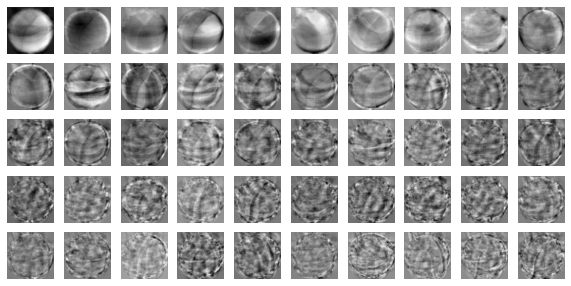

In [7]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

이 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것이다. 한편으론 데이터셋에 있는 어떤 특징을 잡아낸 것처럼 생각할 수도 있다.   
주성분을 찾았으므로 원본 데이터를 주성분에 투영하여 특성의 개수를 10,000개에서 50개로 줄일 수 있다. 이는 마치 원본 데이터를 각 주성분으로 분해하는 것으로 생각할 수 있다. PCA의 transform() 메소드를 사용해 원본 데이터의 차원을 50으로 줄여보자.

In [8]:
print(fruits_2d.shape)

(300, 10000)


In [9]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


fruits_2d 는 (300, 10000) 크기의 배열이었다. 10,000개의 픽셀(특성)을 가진 300개의 이미지이다. 50개의 주성분을 찾은 PCA모델을 사용해 이를 (300, 50) 크기의 배열로 변환했다. 이제 fruits_pca 배열은 50개의 특성을 가진 데이터이다.

### **원본 데이터 재구성**
앞에서 10,000개의 특성을 50개로 줄였다. 이로 인해 어느 정도 손실이 발생할 수밖에 없다. 하지만 분산이 큰 방향으로 데이터를 투영했기 때문에 원본 데이터를 상당 부분 재구성할수 있다.   
PCA 클래스는 이를 위해 inverse_transform() 메소드를 제공한다. 앞서 50개의 차원으로 축소한 fruits_pca 데이터를 전달해 10,000개의 특성을 복원해보자.

In [10]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


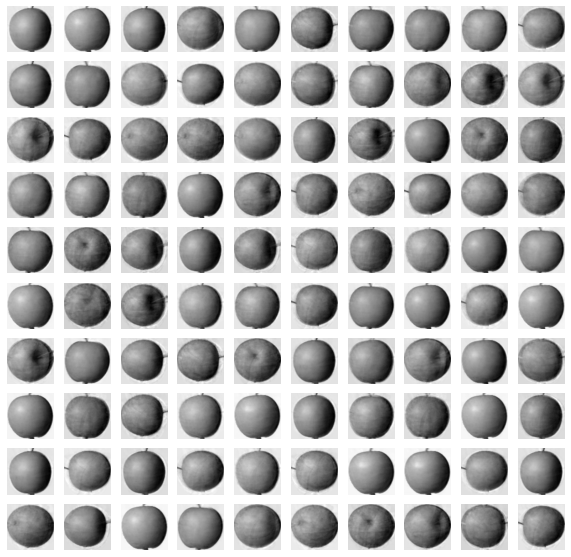

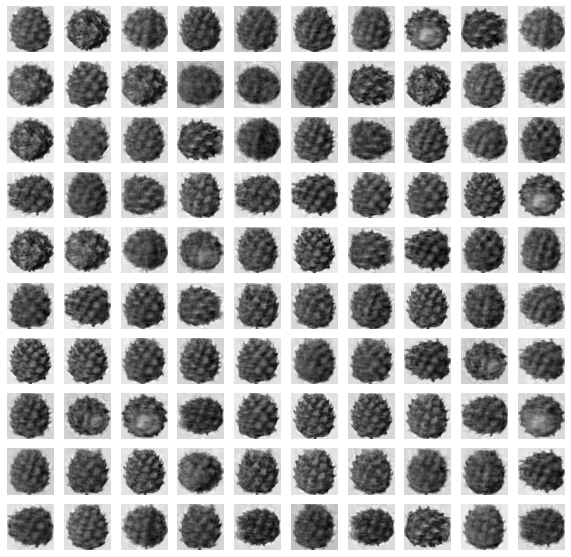

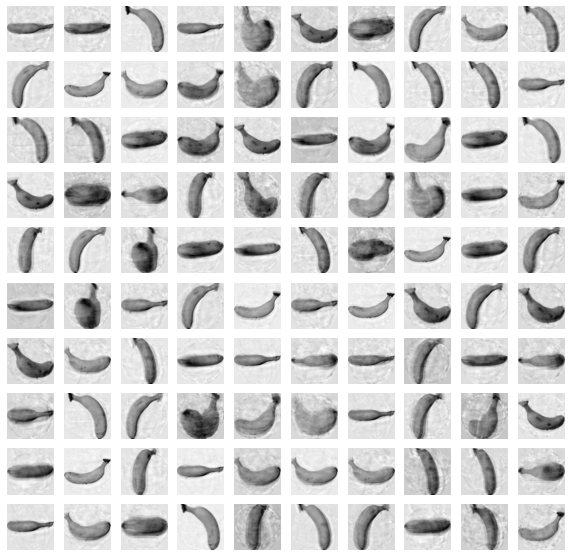

In [11]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print('\n')

### **설명된 분산(explained variance)**
주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 **설명된 분산**이라고 한다. PCA 클래스의 explained_variance_ratio_ 에 각 주성분의 설명된 분산 비율이 기록되어 있다. 당연히 첫 번째 주성분의 설명된 분산이 가장 크다. 이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있다.

In [12]:
print(np.sum(pca.explained_variance_ratio_))

0.9214737781450917


92% 가 넘는 분산을 유지하고 있다. 앞에서 50개의 특성에서 원본 데이터를 복원했을 때 원본 이미지의 품질이 높았던 이유를 여기에서 찾을 수 있다. 설명된 분산의 비율을 그래프로 그려보면 적절한 주성분의 개수를 찾는 데 도움이 된다.

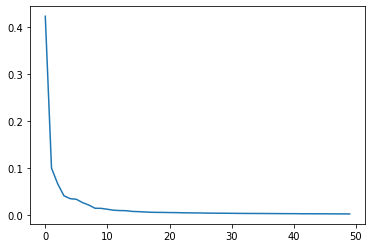

In [13]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

그래프를 보면 처음 10개의 주성분이 대부분의 분산을 표현하고 있다. 그다음부터는 각 주성분이 설명하고 있는 분산은 비교적 작다. 이번엔 PCA로 차원 축소된 데이터를 사용하여 지도 학습 모델을 훈련시켰다.

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [15]:
target = np.array([0]*100 + [1]*100 + [2]*100)

In [16]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.2341282844543457


In [17]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.034094953536987306


50개의 특성만 사용했는데도 정확도가 100% 이고 훈련 시간은 엄청나게 감소했다. PCA로 훈련 데이터의 차원을 축소하면 저장 공간뿐만 아니라 머신러닝 모델의 훈련 속도도 높일 수 있다. 

앞서 PCA 클래스를 사용할 때, n_components 매개변수에 주성분의 개수를 지정했다. 이 대신 원하는 설명된 분산의 비율을 입력할 수도 있다. PCA 클래스는 지정된 비율에 도달할 때까지 자동으로 주성분을 찾는다. 설명된 분산의 50%에 달하는 주성분을 찾도록 PCA 모델을 만들어 본다.

In [18]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [19]:
print(pca.n_components_)

2


단 2개의 특성만으로 원본 데이터에 있는 분산의 50%를 표현할 수 있다. 이 모델로 원본 데이터를 변환한다. 주성분이 2개이므로 변환된 데이터의 크기는 (300, 2) 가 될 것이다.

In [20]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [21]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.99
0.07212677001953124


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [22]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


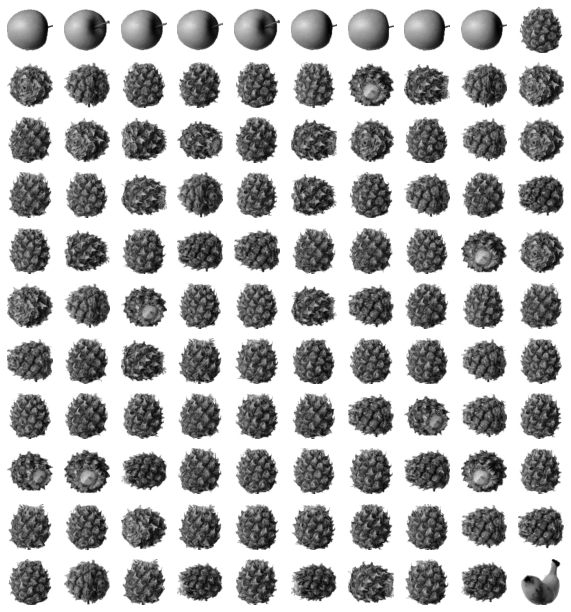

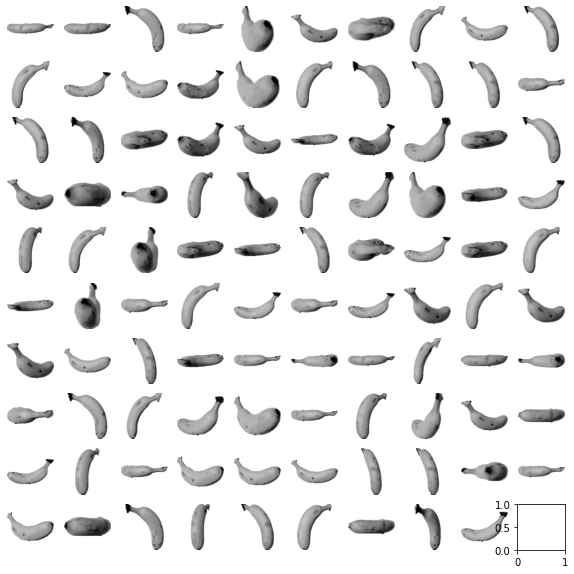

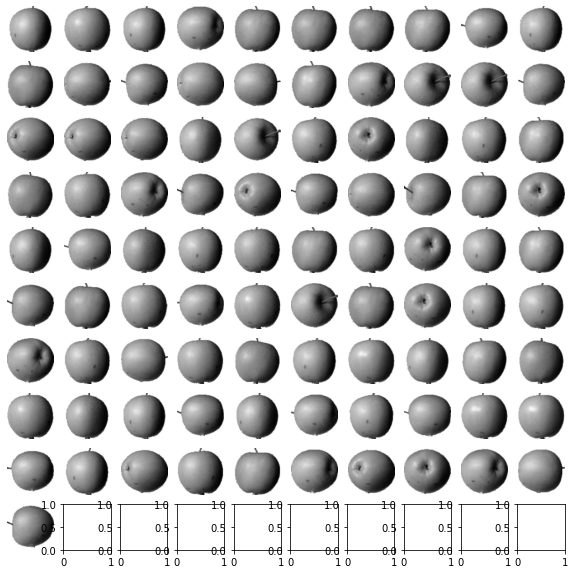

In [23]:
for label in range(0, 3):
  draw_fruits(fruits[km.labels_ == label])
  print('\n')

훈련 데이터의 차원을 줄이면 또 하나 얻을 수 있는 장점은 시각화이다. 3개 이하로 차원을 줄이면 화면에 출력하기 비교적 쉽다. fruits_pca 데이터는 2개의 특성이 있기 때문에 2차원으로 표현할 수 있다. 앞에서 찾은 km.labels_를 사용해 클러스터별로 나누어 산점도를 그려 보자.

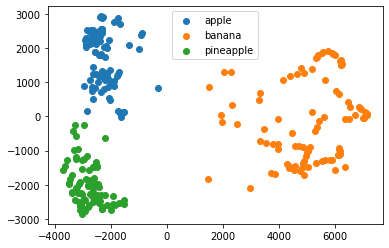

In [27]:
for label in range(0, 3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()